In [71]:
# 라이브러리 임포트 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 원하는 한글 폰트 이름으로 변경
plt.rcParams['axes.unicode_minus'] = False 

In [35]:
import pandas as pd
import numpy as np 

data = pd.read_excel('./Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [172]:
test1 = df_valid.groupby('CustomerID').agg({'Quantity':'sum',
                                           'TotalPrice' : 'sum'})
feature_data = test1.merge(test2, right_index=True, left_index=True)
feature_data=feature_data.merge(test3, right_index=True, left_index=True)
feature_data

,Quantity_x,TotalPrice,Recency,Frequency,Monetary,Length,Quantity_y,PurchaseInterval
CustomerID,,,,,,,,
12347.0,2458,4310.00,2,7,4310.00,315,88,60.333333
12348.0,2341,1797.24,75,4,1797.24,243,344,94.000000
12352.0,536,2506.04,36,8,2506.04,246,33,36.857143
12356.0,1591,2811.43,22,3,2811.43,222,50,151.000000
12358.0,248,1168.06,1,2,1168.06,0,24,149.000000
...,...,...,...,...,...,...,...,...
18272.0,2050,3078.58,2,6,3078.58,222,108,48.200000
18273.0,80,204.00,2,3,204.00,93,60,127.500000
18282.0,103,178.05,7,2,178.05,0,2,118.000000


In [169]:
test2 = rfm_data[['Recency','Frequency','Monetary','Length']]
test2
# 현재 기준 최근 구매날짜 
# 구매 횟수
# max-min

,Recency,Frequency,Monetary,Length
CustomerID,,,,
12347.0,2,7,4310.00,315
12348.0,75,4,1797.24,243
12352.0,36,8,2506.04,246
12356.0,22,3,2811.43,222
12358.0,1,2,1168.06,0
...,...,...,...,...
18272.0,2,6,3078.58,222
18273.0,2,3,204.00,93
18282.0,7,2,178.05,0


In [171]:
test3 = df_rfm.groupby('CustomerID').agg({'Quantity':'sum', # 전체 구매 수량  # 전체 구매 금액
                                 'PurchaseInterval' : 'mean'}) # 평균 구매 간격
test3

,Quantity,PurchaseInterval
CustomerID,,
12347.0,88,60.333333
12348.0,344,94.000000
12352.0,33,36.857143
12356.0,50,151.000000
12358.0,24,149.000000
...,...,...
18272.0,108,48.200000
18273.0,60,127.500000
18282.0,2,118.000000


In [175]:
feature_data.drop(columns=['Quantity_y','TotalPrice'], inplace=True)
feature_data.rename(columns={'Quantity_x' : '총 구매수량',
                             'Recency' : '최근 구매 기간',
                             'Frequency' : '구매 횟수',
                             'Monetary' : '총 구매금액',
                             'Length' : '활동 기간',
                             'PurchaseInterval' : '평균 구매간격'},inplace=True)
feature_data

,총 구매수량,최근 구매 기간,구매 횟수,총 구매금액,활동 기간,평균 구매간격
CustomerID,,,,,,
12347.0,2458,2,7,4310.00,315,60.333333
12348.0,2341,75,4,1797.24,243,94.000000
12352.0,536,36,8,2506.04,246,36.857143
12356.0,1591,22,3,2811.43,222,151.000000
12358.0,248,1,2,1168.06,0,149.000000
...,...,...,...,...,...,...
18272.0,2050,2,6,3078.58,222,48.200000
18273.0,80,2,3,204.00,93,127.500000
18282.0,103,7,2,178.05,0,118.000000


In [176]:
feature_data['평균 구매간격'].mean()

72.18485239269991

In [181]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint


plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [182]:
def preprocess_data(full_df, target_variable):
    full_df_processed = full_df.copy()
    full_df_processed[target_variable + '_log'] = np.log1p(full_df_processed[target_variable])
    
    numerical_features = full_df_processed.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
    numerical_features = [feature for feature in numerical_features if feature not in [target_variable, target_variable + '_log']]
    
    scaler = StandardScaler()
    full_df_processed[numerical_features] = scaler.fit_transform(full_df_processed[numerical_features])
    
    X = full_df_processed.drop([target_variable, target_variable + '_log'], axis=1)
    y = full_df_processed[target_variable + '_log']
    
    return X, y

def split_dataset(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_exp = np.expm1(y_pred)
    y_test_exp = np.expm1(y_test)
    
    rmse = mean_squared_error(y_test_exp, y_pred_exp, squared=False)
    r2 = r2_score(y_test_exp, y_pred_exp)
    
    return rmse, r2

# 데이터 전처리
X, y = preprocess_data(feature_data, '평균 구매간격')

# 데이터 분할
X_train, X_test, y_train, y_test = split_dataset(X, y)

# 모델 실험 및 평가
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=400, random_state=42),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'XGBoost Regressor': XGBRegressor(n_estimators=400, random_state=42),
    'LightGBM Regressor': LGBMRegressor(n_estimators=400, random_state=42)
}

for name, model in models.items():
    model = train_model(X_train, y_train, model)
    rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name}: RMSE = {rmse:.2f}, R^2 = {r2:.2f}")

Gradient Boosting Regressor: RMSE = 65.73, R^2 = 0.12
Support Vector Regressor: RMSE = 62.05, R^2 = 0.21
Linear Regression: RMSE = 70.95, R^2 = -0.03
Random Forest Regressor: RMSE = 65.21, R^2 = 0.13
Ridge Regression: RMSE = 70.95, R^2 = -0.03
Lasso Regression: RMSE = 72.43, R^2 = -0.07
Elastic Net: RMSE = 71.72, R^2 = -0.05
XGBoost Regressor: RMSE = 69.62, R^2 = 0.01
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 2276, number of used features: 5
[LightGBM] [Info] Start training from score 3.884666
LightGBM Regressor: RMSE = 70.62, R^2 = -0.02


In [200]:
feature_data

,총 구매수량,최근 구매 기간,구매 횟수,총 구매금액,활동 기간,평균 구매간격
CustomerID,,,,,,
12347.0,2458,2,7,4310.00,315,60.333333
12348.0,2341,75,4,1797.24,243,94.000000
12352.0,536,36,8,2506.04,246,36.857143
12356.0,1591,22,3,2811.43,222,151.000000
12358.0,248,1,2,1168.06,0,149.000000
...,...,...,...,...,...,...
18272.0,2050,2,6,3078.58,222,48.200000
18273.0,80,2,3,204.00,93,127.500000
18282.0,103,7,2,178.05,0,118.000000


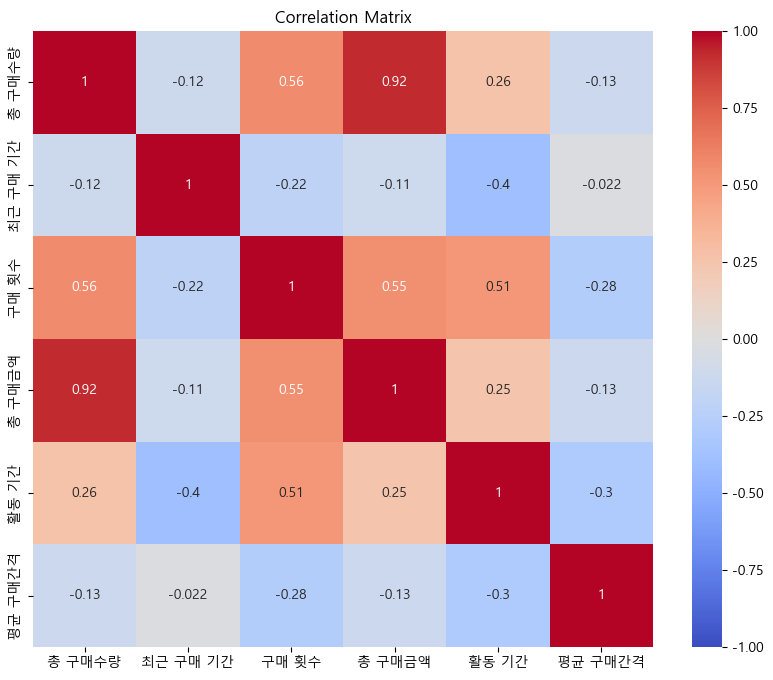

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(feature_data.corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, '평균 구매간격 히스토그램')

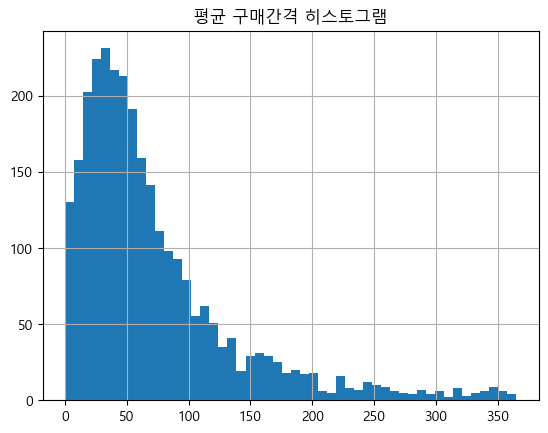

In [211]:
feature_data['평균 구매간격'].hist(bins=50);
plt.title('평균 구매간격 히스토그램')

In [43]:
df_valid['CustomerID'].nunique()

4338

In [39]:
# 비회원 거래 및 취소,반품 거래는 제거 
df_valid = data[data['CustomerID'].notnull()]
df_valid = df_valid[df_valid['UnitPrice'] > 0]
df_valid = df_valid[df_valid['Quantity'] > 0]
df_valid.shape

(397884, 8)

In [38]:
# 고객별 중복되는 InvoiceNo 필터링 
unique_df = df_valid.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])
unique_df.shape

(18532, 8)

In [40]:
unique_df = unique_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# 이전 구매 날짜를 구하기 위해 shift(1) 사용
unique_df['PrevInvoiceDate'] = unique_df.groupby('CustomerID')['InvoiceDate'].shift(1)

# 현재 구매와 이전 구매 사이의 간격 계산
unique_df['PurchaseInterval'] = (unique_df['InvoiceDate'] - unique_df['PrevInvoiceDate']).dt.days

unique_df.shape

(18532, 10)

In [41]:
df_rfm = unique_df[unique_df['PrevInvoiceDate'].notnull()]
df_rfm.shape

(14194, 10)

- 18532 거래 중에 4338 거래는 이전 구매일이 없음. 해당 고객은 첫구매만 한 사람들
- RFM 에서 제외

In [42]:
df_rfm['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [58]:
last_date = pd.to_datetime('2011-12-10')

# Recency
recency_data = df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['InvoiceDate']).dt.days

# Frequency
frequency_data = df_valid.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_data.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)

# MonetaryValue
df_valid['TotalPrice'] = df_valid['Quantity'] * df_valid['UnitPrice']
monetary_data = df_valid.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_data.rename(columns={'TotalPrice':'Monetary'}, inplace=True)

# Length
purchase_dates = df_rfm.groupby('CustomerID')['InvoiceDate'].agg(['min','max']).reset_index()
purchase_dates['Length'] = (purchase_dates['max'] - purchase_dates['min']).dt.days

# RFML 결합
rfm_data = recency_data.merge(frequency_data, on='CustomerID').merge(monetary_data, on='CustomerID').merge(purchase_dates, on='CustomerID')
rfm_data

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,min,max,Length
0,12347.0,2011-12-07 15:52:00,2,7,4310.00,2011-01-26 14:30:00,2011-12-07 15:52:00,315
1,12348.0,2011-09-25 13:13:00,75,4,1797.24,2011-01-25 10:42:00,2011-09-25 13:13:00,243
2,12352.0,2011-11-03 14:37:00,36,8,2506.04,2011-03-01 14:57:00,2011-11-03 14:37:00,246
3,12356.0,2011-11-17 08:40:00,22,3,2811.43,2011-04-08 12:33:00,2011-11-17 08:40:00,222
4,12358.0,2011-12-08 10:26:00,1,2,1168.06,2011-12-08 10:26:00,2011-12-08 10:26:00,0
...,...,...,...,...,...,...,...,...
2840,18272.0,2011-12-07 12:43:00,2,6,3078.58,2011-04-28 18:11:00,2011-12-07 12:43:00,222
2841,18273.0,2011-12-07 13:16:00,2,3,204.00,2011-09-05 11:27:00,2011-12-07 13:16:00,93
2842,18282.0,2011-12-02 11:43:00,7,2,178.05,2011-12-02 11:43:00,2011-12-02 11:43:00,0
2843,18283.0,2011-12-06 12:02:00,3,16,2094.88,2011-01-23 14:58:00,2011-12-06 12:02:00,316


In [61]:
rfm_data.set_index('CustomerID', inplace=True)
rfm_data.drop(columns=['InvoiceDate','min','max'], inplace=True)
rfm_data

,Recency,Frequency,Monetary,Length
CustomerID,,,,
12347.0,2,7,4310.00,315
12348.0,75,4,1797.24,243
12352.0,36,8,2506.04,246
12356.0,22,3,2811.43,222
12358.0,1,2,1168.06,0
...,...,...,...,...
18272.0,2,6,3078.58,222
18273.0,2,3,204.00,93
18282.0,7,2,178.05,0


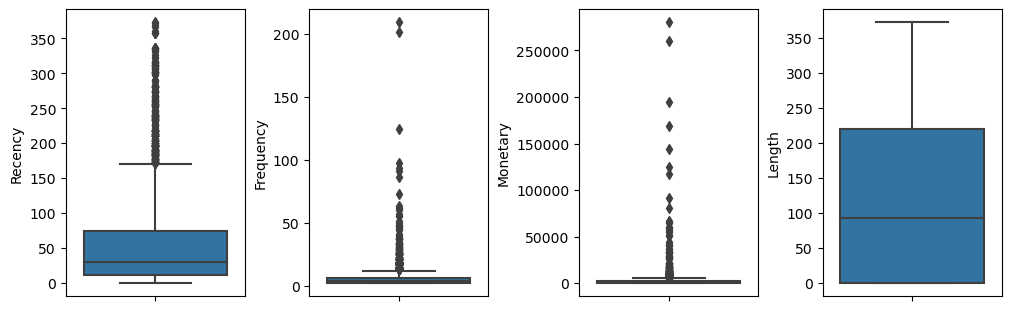

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,4, figsize=(10,3), constrained_layout = True)
for a,b in enumerate(list(rfm_data.columns)):
    sns.boxplot(y=rfm_data[b], ax=ax[a])
plt.show()

In [65]:
# 경계값을 기준으로 점수 할당 함수 정의
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 1
    elif value <= boundaries[1]:
        return 2
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 4
    elif value <= boundaries[4]:
        return 5
    else:
        return 6

def assign_score_2(value, boundaries):
    if value <= boundaries[0]:
        return 6
    elif value <= boundaries[1]:
        return 5
    elif value <= boundaries[2]:
        return 4
    elif value <= boundaries[3]:
        return 3
    elif value <= boundaries[4]:
        return 2
    else:
        return 1

# Recency, Frequency, Monetary, Length 비율 분배
r_boundaries = np.percentile(rfm_data['Recency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
f_boundaries = np.percentile(rfm_data['Frequency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
m_boundaries = np.percentile(rfm_data['Monetary'], [2.5, 13.5, 34, 66, 86.5, 97.5])
l_boundaries = np.percentile(rfm_data['Length'], [2.5, 13.5, 34, 66, 86.5, 97.5])

# 각 RFM 점수에 대해 점수 할당
rfm_data['R_Score'] = rfm_data['Recency'].apply(lambda x: assign_score_2(x, r_boundaries))
rfm_data['F_Score'] = rfm_data['Frequency'].apply(lambda x: assign_score(x, f_boundaries))
rfm_data['M_Score'] = rfm_data['Monetary'].apply(lambda x: assign_score(x, m_boundaries))
rfm_data['L_Score'] = rfm_data['Length'].apply(lambda x: assign_score(x, l_boundaries))
# RFM 스코어 계산

rfm_data['RFML_Score'] = rfm_data['R_Score'] + rfm_data['F_Score'] + rfm_data['M_Score'] + rfm_data['L_Score']

print(rfm_data)

            Recency  Frequency  Monetary  Length  R_Score  F_Score  M_Score  \
CustomerID                                                                    
12347.0           2          7   4310.00     315        5        5        6   
12348.0          75          4   1797.24     243        2        4        4   
12352.0          36          8   2506.04     246        3        5        5   
12356.0          22          3   2811.43     222        3        3        5   
12358.0           1          2   1168.06       0        6        1        4   
...             ...        ...       ...     ...      ...      ...      ...   
18272.0           2          6   3078.58     222        5        5        5   
18273.0           2          3    204.00      93        5        3        2   
18282.0           7          2    178.05       0        4        1        1   
18283.0           3         16   2094.88     316        5        6        5   
18287.0          42          3   1837.28      15    

In [66]:
import numpy as np

recency_values = rfm_data['Recency']

frequency_values = rfm_data['Frequency']

monetary_values = rfm_data['Monetary']

length_values = rfm_data['Length']

# 경계값을 계산
def calculate_boundaries(values, name):
    percentiles = [97.5, 86.5, 66, 34, 13.5, 2.5]
    if name == 'Recency':
        percentiles = percentiles[::-1]
    boundaries = {str(6-i): np.percentile(values, p) for i, p in enumerate(percentiles)}
    return boundaries

boundaries_all = {
    'Recency': calculate_boundaries(rfm_data['Recency'], 'Recency'),
    'Frequency': calculate_boundaries(rfm_data['Frequency'], 'Frequency'),
    'Monetary': calculate_boundaries(rfm_data['Monetary'], 'Monetary'),
    'Length': calculate_boundaries(rfm_data['Length'], 'Length')
}

for feature, bounds in boundaries_all.items():
    print(f"{feature} boundaries:")
    for score, boundary in sorted(bounds.items()):
        print(f"Score {score}: {boundary}")
    print()
    

Recency boundaries:
Score 1: 262.8000000000002
Score 2: 136.0
Score 3: 56.0
Score 4: 17.0
Score 5: 4.0
Score 6: 1.0

Frequency boundaries:
Score 1: 2.0
Score 2: 2.0
Score 3: 3.0
Score 4: 5.0
Score 5: 10.0
Score 6: 24.0

Monetary boundaries:
Score 1: 188.079
Score 2: 408.3084
Score 3: 765.272
Score 4: 1826.2736000000004
Score 5: 3877.8638
Score 6: 12665.776000000003

Length boundaries:
Score 1: 0.0
Score 2: 0.0
Score 3: 16.0
Score 4: 176.0
Score 5: 292.0
Score 6: 358.0



In [69]:
def classify_customer(row):
    r, f, m, l = row['R_Score'], row['F_Score'], row['M_Score'], row['L_Score']
     # VIP
    if r >= 5 and f >= 5 and m >= 5 and l >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4 and l >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and l >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and l >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3 and l >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값

rfm_data['CustomerID'] = rfm_data.apply(classify_customer, axis=1)

print(rfm_data[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'L_Score', '고객등급']].head())

           CustomerID  R_Score  F_Score  M_Score  L_Score     고객등급
CustomerID                                                        
12347.0           VIP        5        5        6        6      VIP
12348.0       VIP이탈고객        2        4        4        5  VIP이탈고객
12352.0       VIP이탈고객        3        5        5        5  VIP이탈고객
12356.0        충성예정고객        3        3        5        5   충성예정고객
12358.0          일반고객        6        1        4        1     일반고객


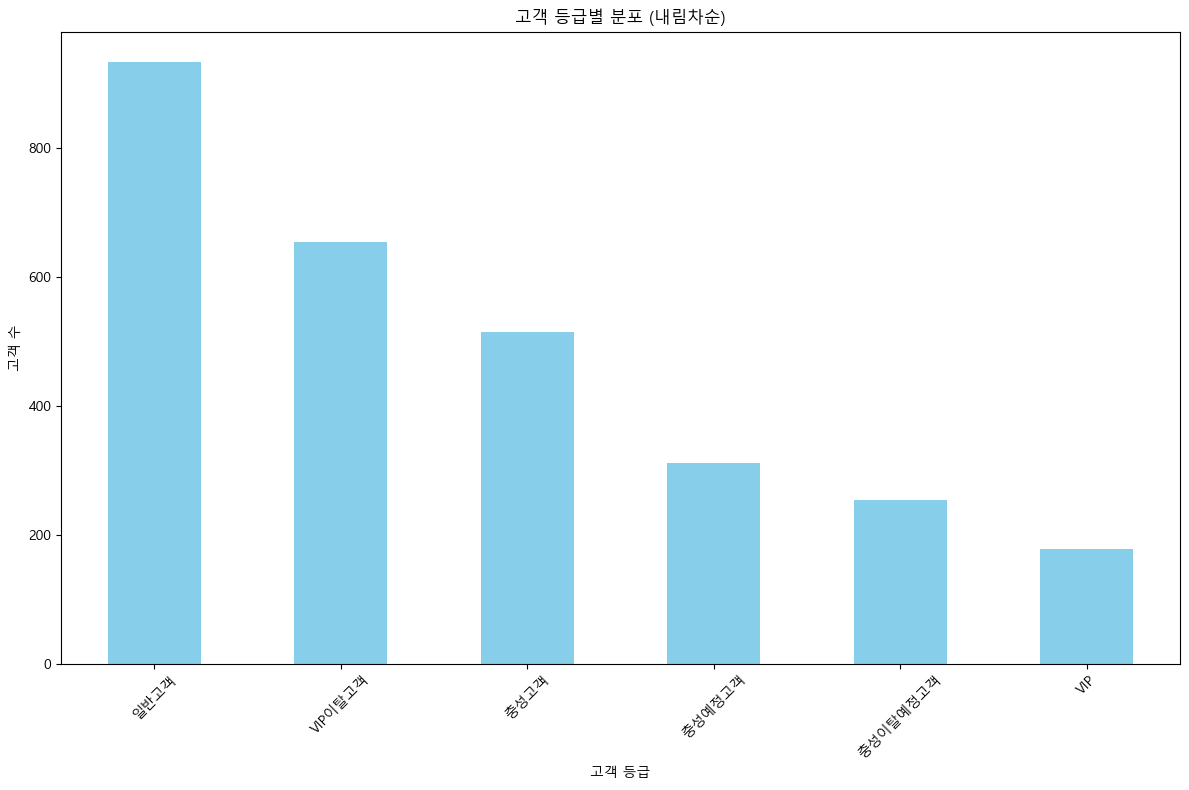

In [72]:
import matplotlib.pyplot as plt

customer_grade_counts_desc = rfm_data['고객등급'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
customer_grade_counts_desc.plot(kind='bar', color='skyblue')
plt.title('고객 등급별 분포 (내림차순)')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

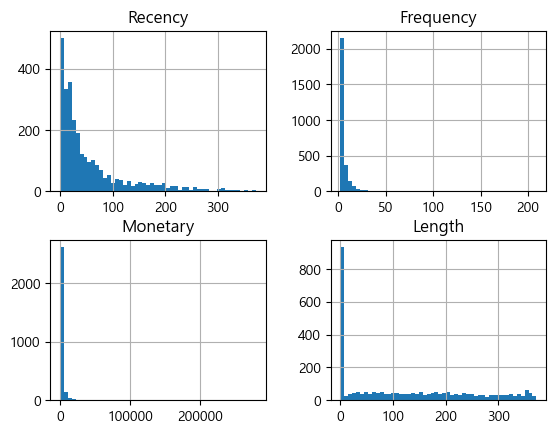

In [96]:
rfm_data[['Recency','Frequency','Monetary','Length']].hist(bins=50);

In [78]:
# Log scale 변환
rfm_cluster = rfm_data[['Recency','Frequency','Monetary','Length']]
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log.head()

,Recency,Frequency,Monetary,Length
CustomerID,,,,
12347.0,1.098612,2.079442,8.368925,5.755742
12348.0,4.330733,1.609438,7.494564,5.497168
12352.0,3.610918,2.197225,7.826858,5.509388
12356.0,3.135494,1.386294,7.941804,5.407172
12358.0,0.693147,1.098612,7.063955,0.000000


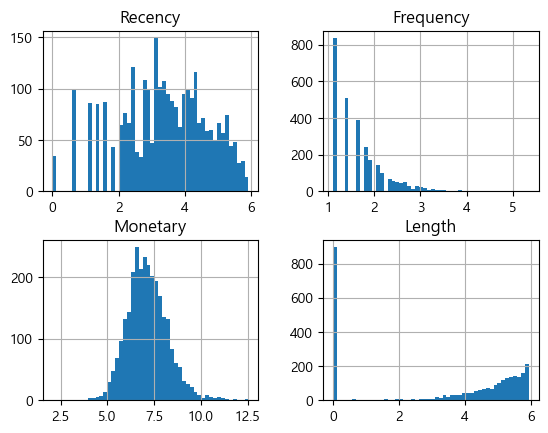

In [80]:
rfm_cluster_log.hist(bins=50);

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

cluster = rfm_data[['Recency','Frequency','Monetary','Length']]
X=StandardScaler().fit_transform(cluster)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_init='auto',n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

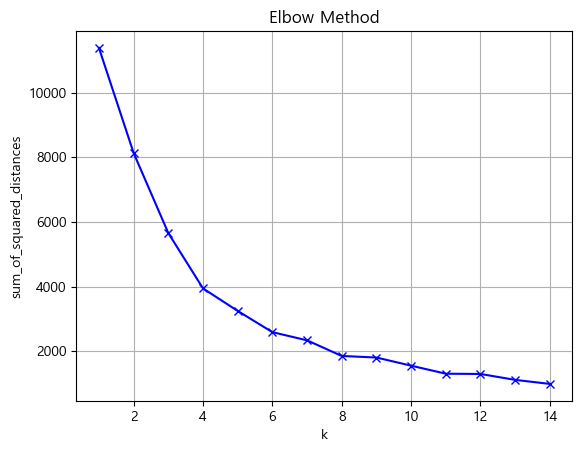

In [99]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.grid()
plt.show()

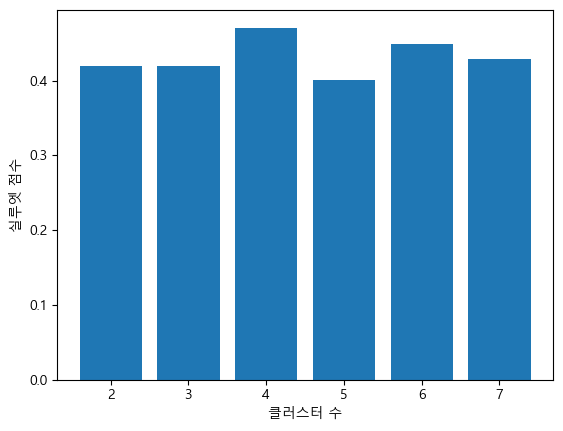

In [100]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_init='auto',n_clusters = n_cluster).fit_predict(X))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('클러스터 수', fontsize = 10) 
plt.ylabel('실루엣 점수', fontsize = 10) 
plt.show()

In [115]:
k_means = KMeans(n_init='auto',n_clusters=6)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.46494485334309005

In [116]:
cluster['Cluster'] = labels

table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary': 'mean', 'Length':'mean'})
table['cluster 분류'] = cluster['Cluster'].value_counts()
table

C:\Users\jkj12\AppData\Local\Temp\ipykernel_20128\3783277871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Cluster'] = labels


,Recency,Frequency,Monetary,Length,cluster 분류
Cluster,,,,,
0,30.098577,6.906504,2552.554888,233.795732,984
1,7.777143,22.931429,13257.863200,332.742857,175
2,38.937903,3.043548,1132.843187,34.870968,1240
3,5.750000,120.500000,55312.686250,364.125000,8
4,7.000000,42.833333,190863.461667,284.000000,6
5,200.833333,2.858796,1089.926600,27.668981,432


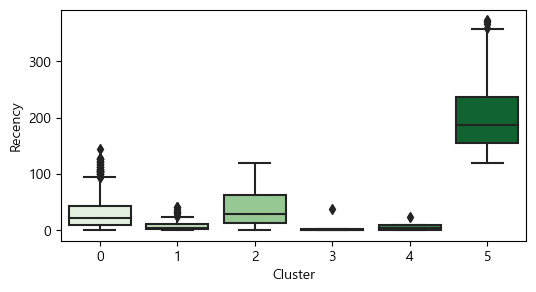

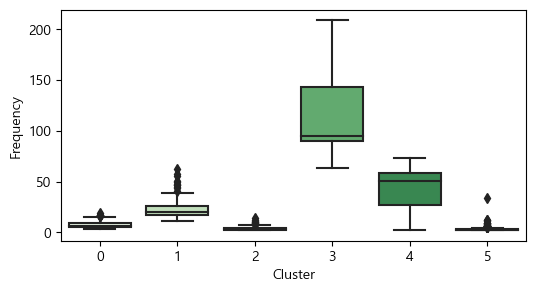

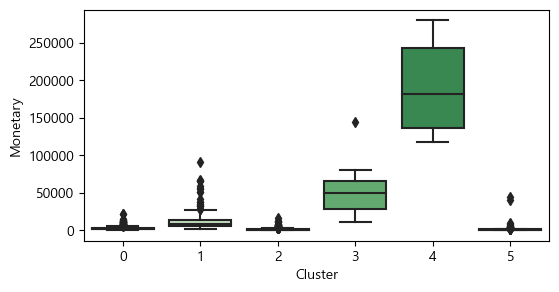

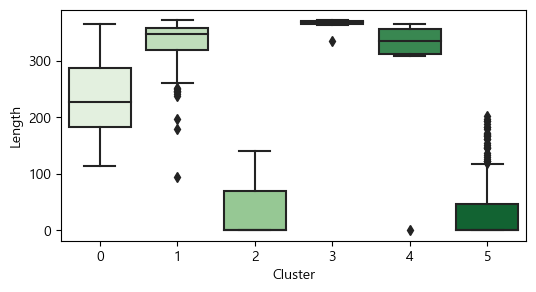

In [117]:
for i,c in enumerate(list(cluster.columns[:4])):
    plt.figure(figsize = (6,3))
    sns.boxplot(y = cluster[c], x = cluster['Cluster'], order = [0,1,2,3,4,5], palette='Greens')
    plt.show()

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(cluster.drop('Cluster', axis=1))
y = cluster['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 테스트 데이터 세트에 대한 성능 평가
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
344 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\s

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 0.9848


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 최적의 하이퍼파라미터를 사용하여 모델 초기화
rf_optimized = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features='sqrt',
    random_state=0
)

# 모델 학습
rf_optimized.fit(X_train, y_train)

# 훈련 세트에 대한 성능 평가
y_train_pred = rf_optimized.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.4f}")

# 테스트 세트에 대한 성능 평가
y_test_pred = rf_optimized.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")

Training Set Accuracy: 1.0000
Test Set Accuracy: 0.9883


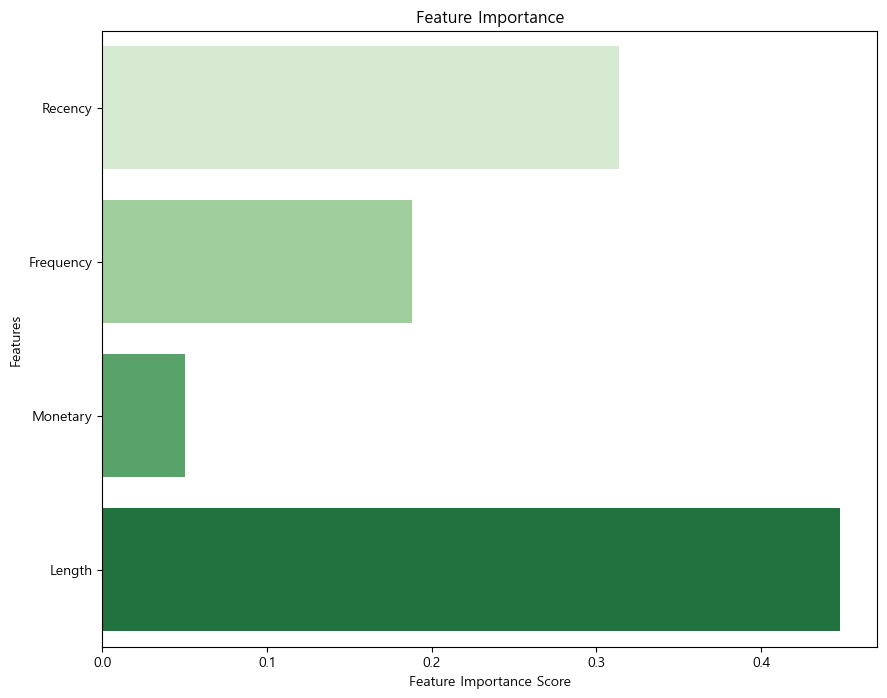

Recency: 0.31
Frequency: 0.19
Monetary: 0.05
Length: 0.45


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=rf_optimized.feature_importances_, y=cluster.columns[:4], palette='Greens')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# 가중치 계산
feature_importances = rf_optimized.feature_importances_
score = feature_importances / feature_importances.sum()

# 각 특성의 가중치 출력
for feature, importance in zip(cluster.columns[:4], score):
    print(f'{feature}: {round(importance, 2)}')

In [123]:
# 가중치를 통해 RFML 점수 계산

rfm_data["RFML"] = rfm_data['R_Score'] * score[0]+ rfm_data['F_Score'] * score[1] + rfm_data['M_Score'] * score[2] + rfm_data['L_Score'] * score[3]
rfm_data['RFML'].describe()

count    2845.000000
mean        3.363418
std         1.399609
min         1.000000
25%         1.941423
50%         3.610493
75%         4.401819
max         6.000000
Name: RFML, dtype: float64

In [124]:
##이때 기준은 신세계를 기준으로
def segment(row):
    if row <= 1.5:
        return 'None'
    elif row <= 2:
        return 'Red'
    elif row <= 3:
        return 'Black'
    elif row <= 4:
        return 'Gold'
    elif row <= 5:
        return 'Platinum'
    else:
        return 'Diamond'

In [125]:
rfm_data['가중치고객등급'] = rfm_data['RFML'].apply(segment)

In [126]:
rfm_data['가중치고객등급'].value_counts()

가중치고객등급
Gold        816
Platinum    696
None        443
Diamond     355
Red         308
Black       227
Name: count, dtype: int64

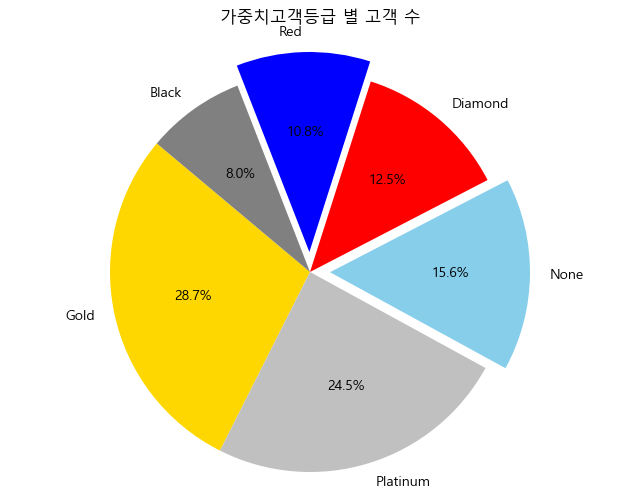

In [127]:
grade_counts = rfm_data['가중치고객등급'].value_counts()
labels = grade_counts.index
sizes = grade_counts.values

colors = ['gold', 'silver', 'skyblue', 'red', 'blue', 'gray']
explode = (0, 0, 0.1, 0, 0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('가중치고객등급 별 고객 수')
plt.axis('equal') 
plt.show()

In [128]:
rfm_data.groupby('가중치고객등급')['Monetary'].sum().sort_values() / rfm_data['Monetary'].sum()*100

가중치고객등급
Red          3.372343
None         3.462324
Black        5.215329
Gold        14.743062
Platinum    23.761792
Diamond     49.445149
Name: Monetary, dtype: float64

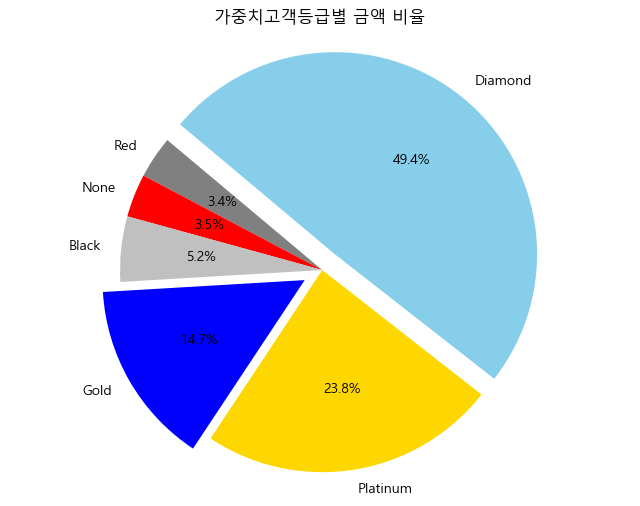

In [129]:
grade_counts = rfm_data.groupby('가중치고객등급')['Monetary'].sum().sort_values() / rfm_data['Monetary'].sum()*100
labels = grade_counts.index
sizes = grade_counts.values

colors = ['gray', 'Red', 'silver', 'blue', 'gold', 'skyblue']
explode = (0, 0, 0, 0.1, 0, 0.1) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('가중치고객등급별 금액 비율')
plt.axis('equal') 
plt.show()

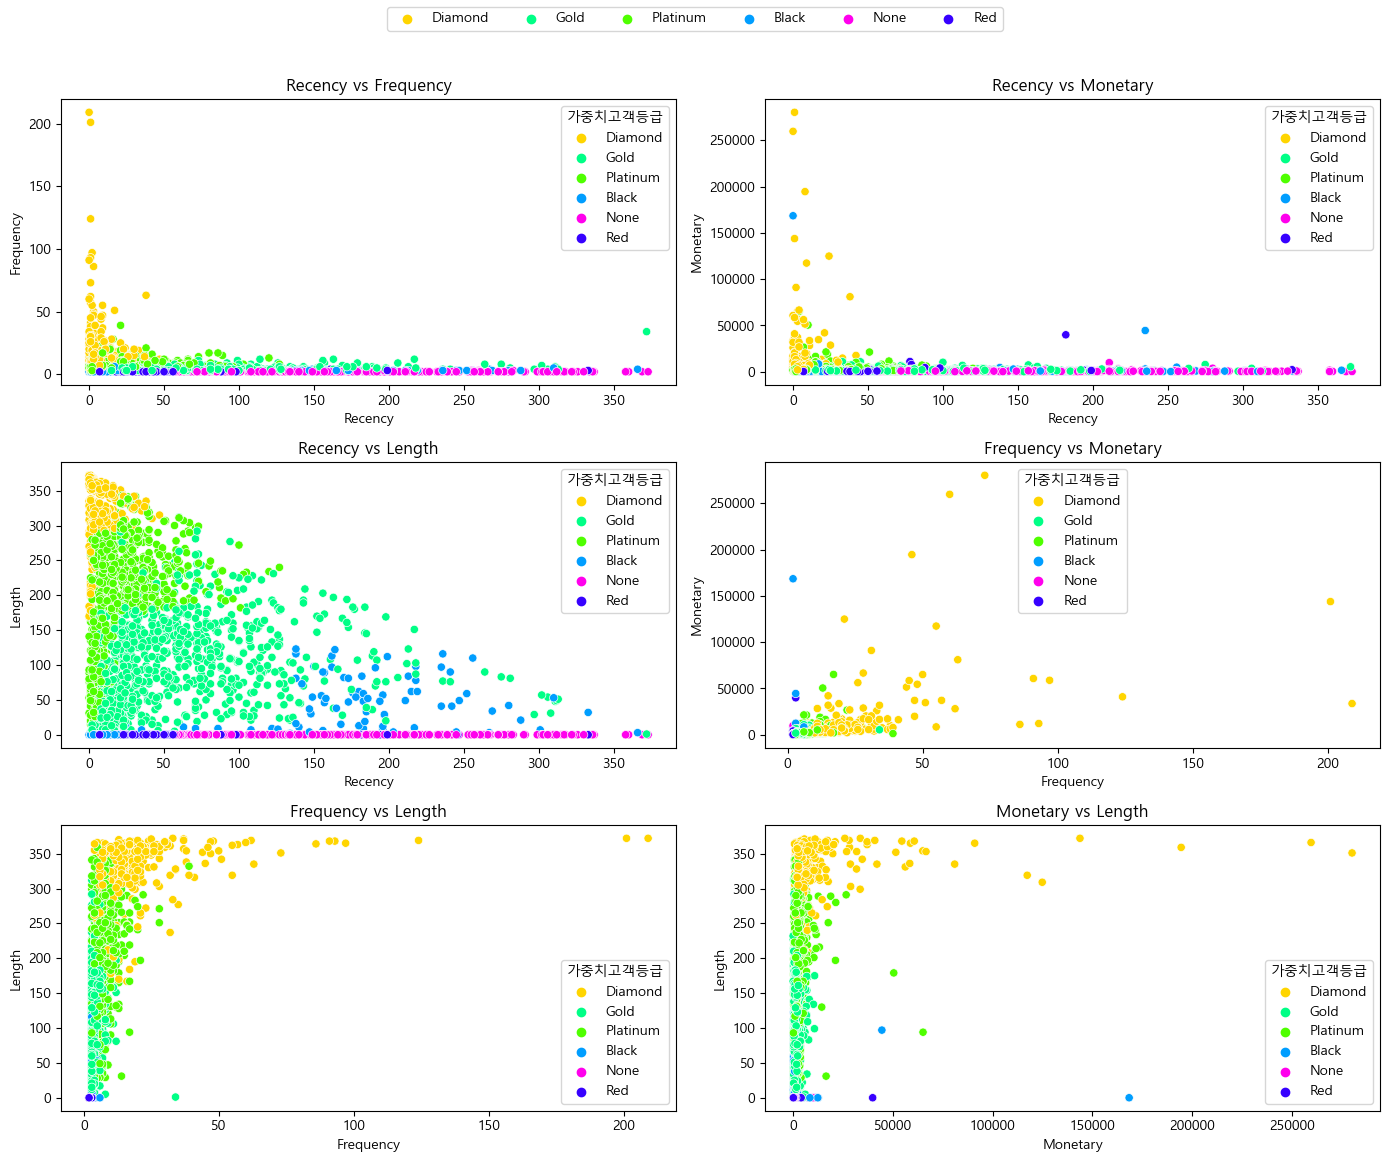

In [130]:
unique_grades = rfm_data['가중치고객등급'].unique()
grade_order = ['Diamond', 'Platinum', 'Gold', 'Black', 'Red', 'None']
palette = sns.color_palette("hsv", len(unique_grades))

color_mapping = {grade: color for grade, color in zip(grade_order, palette)}

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# R_Score vs F_Score
sns.scatterplot(ax=axes[0, 0], x='Recency', y='Frequency', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 0].set_title('Recency vs Frequency')

# R_Score vs M_Score
sns.scatterplot(ax=axes[0, 1], x='Recency', y='Monetary', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 1].set_title('Recency vs Monetary')

# R_Score vs L_Score
sns.scatterplot(ax=axes[1, 0], x='Recency', y='Length', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 0].set_title('Recency vs Length')

# F_Score vs M_Score
sns.scatterplot(ax=axes[1, 1], x='Frequency', y='Monetary', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 1].set_title('Frequency vs Monetary')

sns.scatterplot(ax=axes[2, 0], x='Frequency', y='Length', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 0].set_title('Frequency vs Length')

# Monetary vs Length
sns.scatterplot(ax=axes[2, 1], x='Monetary', y='Length', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 1].set_title('Monetary vs Length')


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(rfm_data['가중치고객등급'].unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

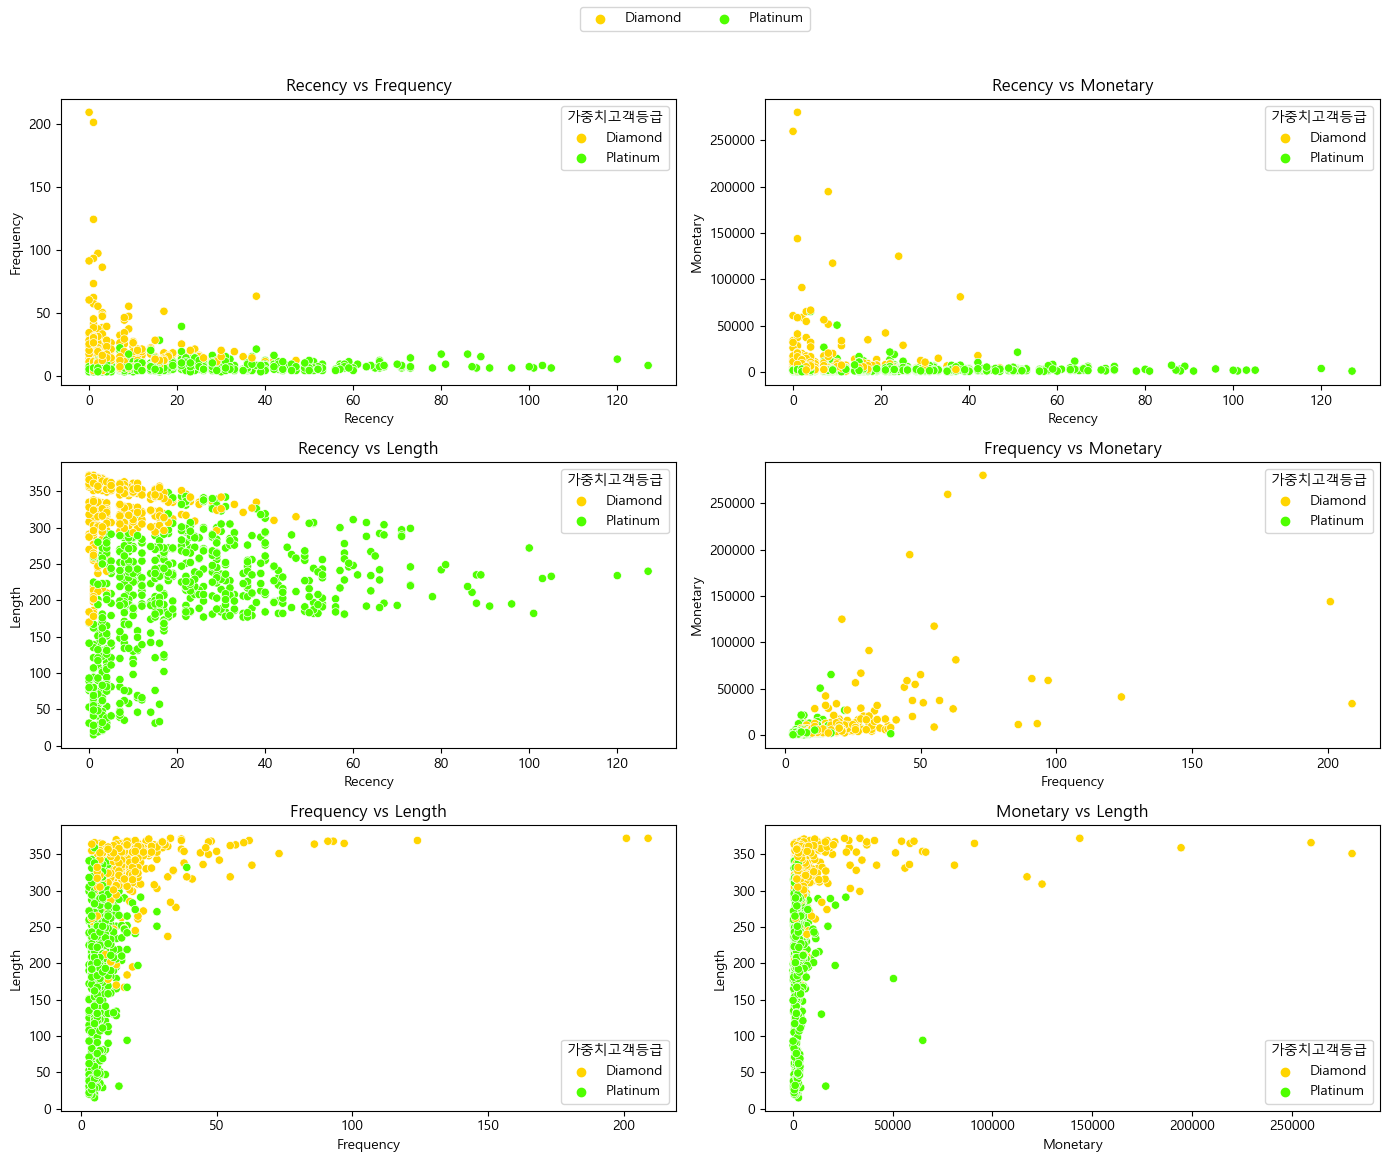

In [131]:
diamond_platinum_data = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond', 'Platinum'])]

palette_restricted = {grade: color for grade, color in color_mapping.items() if grade in ['Diamond', 'Platinum']}

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# R_Score vs F_Score
sns.scatterplot(ax=axes[0, 0], x='Recency', y='Frequency', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 0].set_title('Recency vs Frequency')

# R_Score vs M_Score
sns.scatterplot(ax=axes[0, 1], x='Recency', y='Monetary', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 1].set_title('Recency vs Monetary')

# R_Score vs L_Score
sns.scatterplot(ax=axes[1, 0], x='Recency', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 0].set_title('Recency vs Length')

# F_Score vs M_Score
sns.scatterplot(ax=axes[1, 1], x='Frequency', y='Monetary', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 1].set_title('Frequency vs Monetary')

sns.scatterplot(ax=axes[2, 0], x='Frequency', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 0].set_title('Frequency vs Length')

# Monetary vs Length
sns.scatterplot(ax=axes[2, 1], x='Monetary', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 1].set_title('Monetary vs Length')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(diamond_platinum_data['가중치고객등급'].unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

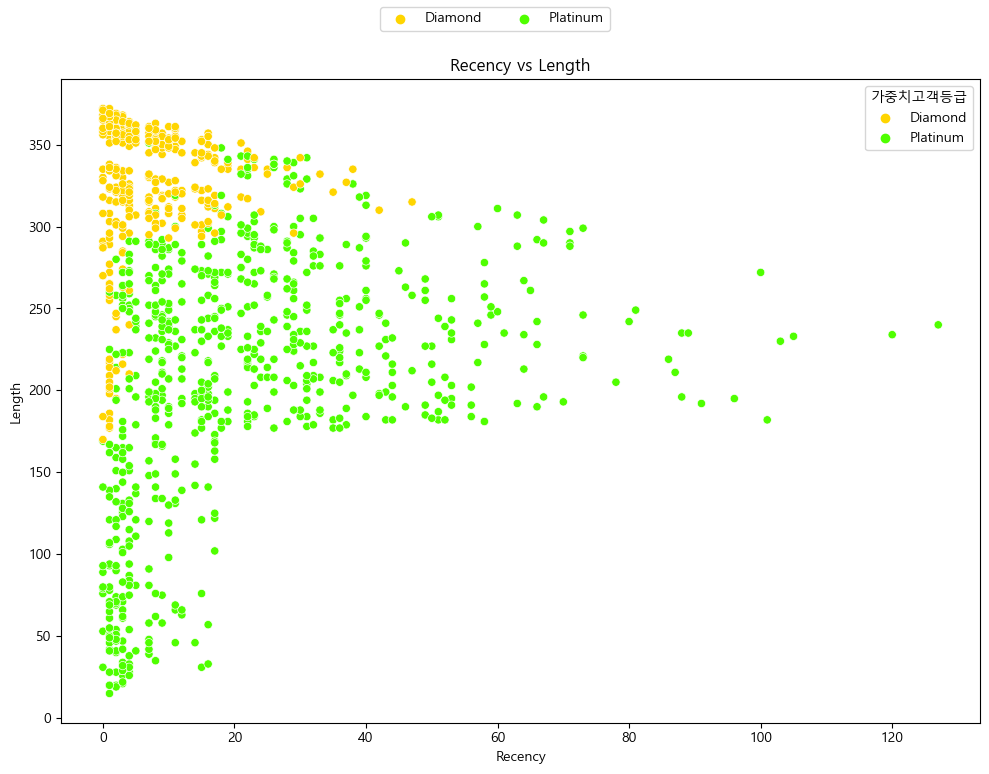

In [132]:
diamond_platinum_data = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond', 'Platinum'])]

palette_restricted = {grade: color for grade, color in color_mapping.items() if grade in ['Diamond', 'Platinum']}

fig, axes = plt.subplots(figsize=(10, 8))

# R_Score vs L_Score
sns.scatterplot(ax=axes, x='Recency', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes.set_title('Recency vs Length')


handles, labels = axes.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(diamond_platinum_data['가중치고객등급'].unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [133]:
import pandas as pd

grade_combinations = rfm_data.groupby(['고객등급', '가중치고객등급']).size().reset_index(name='Count')

grade_combinations_sorted = grade_combinations.sort_values(by='가중치고객등급', ascending=False)

print(grade_combinations_sorted)

        고객등급   가중치고객등급  Count
9       일반고객       Red    308
1        VIP  Platinum     14
16    충성예정고객  Platinum     55
4    VIP이탈고객  Platinum    311
12      충성고객  Platinum    305
8       일반고객  Platinum     11
7       일반고객      None    443
15    충성예정고객      Gold    253
11      충성고객      Gold     50
18  충성이탈예정고객      Gold    176
6       일반고객      Gold     24
3    VIP이탈고객      Gold    313
10      충성고객   Diamond    159
14    충성예정고객   Diamond      2
2    VIP이탈고객   Diamond     30
0        VIP   Diamond    164
5       일반고객     Black    147
13    충성예정고객     Black      2
17  충성이탈예정고객     Black     78


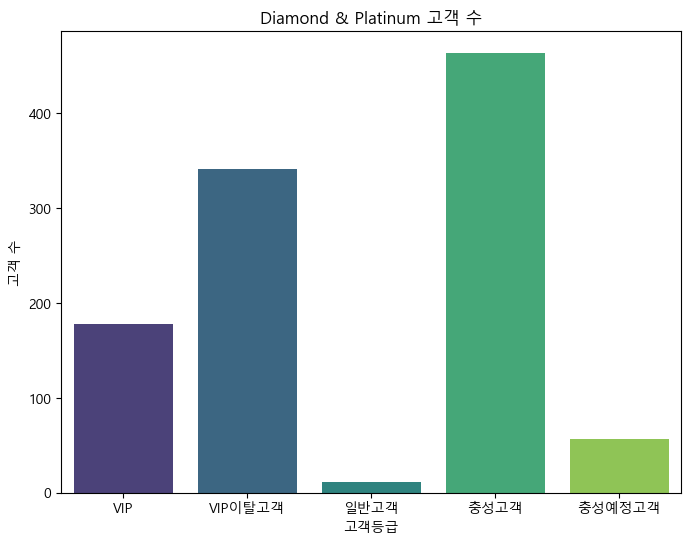

In [135]:
filtered_data = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond', 'Platinum'])]

aggregated_data = filtered_data.groupby('고객등급').size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='고객등급', y='Count', data=aggregated_data, palette='viridis')
plt.title('Diamond & Platinum 고객 수')
plt.xlabel('고객등급')
plt.ylabel('고객 수')
plt.show()

In [137]:
aggregated_data

,고객등급,Count
0,VIP,178
1,VIP이탈고객,341
2,일반고객,11
3,충성고객,464
4,충성예정고객,57


<Axes: xlabel='InvoiceDate'>

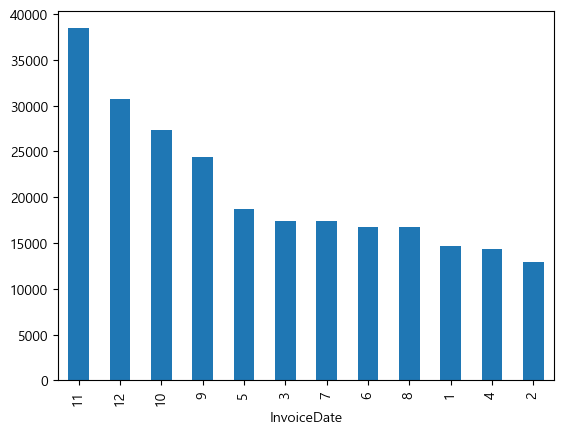

In [155]:
# Diamond & Platinum 고객 등급별 월별 구매비율 

idx = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond','Platinum'])].index.unique().tolist()
test = df_valid[df_valid['CustomerID'].isin(idx)]

# diamond & platinum 의 월별 구매 비율 
test['InvoiceDate'].dt.month.value_counts().plot(kind='bar')

In [139]:
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
# 예측할 변수와 사용할 특성 선택
features = rfm_data[['RFM_score', 'Recency', 'Frequency', 'MonetaryValue', 'Length']]
target = active['PurchaseInterval']

In [191]:
rfm_data

,Recency,Frequency,Monetary,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score,고객등급,CustomerID,RFML,가중치고객등급
CustomerID,,,,,,,,,,,,,
12347.0,2,7,4310.00,315,5,5,6,6,22,VIP,VIP,5.498116,Diamond
12348.0,75,4,1797.24,243,2,4,4,5,15,VIP이탈고객,VIP이탈고객,3.820468,Gold
12352.0,36,8,2506.04,246,3,5,5,5,18,VIP이탈고객,VIP이탈고객,4.372384,Platinum
12356.0,22,3,2811.43,222,3,3,5,5,16,충성예정고객,충성예정고객,3.996232,Gold
12358.0,1,2,1168.06,0,6,1,4,1,12,일반고객,일반고객,2.719136,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272.0,2,6,3078.58,222,5,5,5,5,20,VIP,VIP,5.000000,Platinum
18273.0,2,3,204.00,93,5,3,2,4,14,일반고객,일반고객,4.025667,Platinum
18282.0,7,2,178.05,0,4,1,1,1,7,일반고객,일반고객,1.941423,Red


In [199]:
rfm_data.groupby('가중치고객등급').agg({'Recency' : 'mean', 'Frequency' : 'mean', 'Monetary' : 'mean', 'Length' : 'mean'}).style.background_gradient().format("{:,.0f}")

,Recency,Frequency,Monetary,Length
가중치고객등급,,,,
Black,74,3,"1,906",17
Diamond,7,19,"11,554",326
Gold,61,4,"1,499",104
None,157,2,648,0
Platinum,22,7,"2,832",206
Red,39,2,908,0


In [198]:
rfm_data.groupby('고객등급').agg({'Recency' : 'mean', 'Frequency' : 'mean', 'Monetary' : 'mean'}).style.background_gradient().format("{:,.0f}")

,Recency,Frequency,Monetary
고객등급,,,
VIP,2,23,"13,973"
VIP이탈고객,56,7,"3,124"
일반고객,90,2,958
충성고객,9,9,"4,384"
충성예정고객,23,3,"1,078"
충성이탈예정고객,130,3,"1,107"


In [207]:
rfm_data

,Recency,Frequency,Monetary,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score,고객등급,CustomerID,RFML,가중치고객등급
CustomerID,,,,,,,,,,,,,
12347.0,2,7,4310.00,315,5,5,6,6,22,VIP,VIP,5.498116,Diamond
12348.0,75,4,1797.24,243,2,4,4,5,15,VIP이탈고객,VIP이탈고객,3.820468,Gold
12352.0,36,8,2506.04,246,3,5,5,5,18,VIP이탈고객,VIP이탈고객,4.372384,Platinum
12356.0,22,3,2811.43,222,3,3,5,5,16,충성예정고객,충성예정고객,3.996232,Gold
12358.0,1,2,1168.06,0,6,1,4,1,12,일반고객,일반고객,2.719136,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272.0,2,6,3078.58,222,5,5,5,5,20,VIP,VIP,5.000000,Platinum
18273.0,2,3,204.00,93,5,3,2,4,14,일반고객,일반고객,4.025667,Platinum
18282.0,7,2,178.05,0,4,1,1,1,7,일반고객,일반고객,1.941423,Red


In [629]:
# 평균 구매 주기 계산
avg_purchase_interval = df.groupby('CustomerID')['PurchaseInterval'].mean().reset_index()
avg_purchase_interval

,CustomerID,PurchaseInterval
0,12346.0,NaN
1,12347.0,60.333333
2,12348.0,94.000000
3,12349.0,NaN
4,12350.0,NaN
...,...,...
4333,18280.0,NaN
4334,18281.0,NaN
4335,18282.0,118.000000
4336,18283.0,21.800000


In [652]:
avg_purchase_interval['PurchaseInterval'].mean()

72.24236205240797

In [637]:
# 구매 주기가 없는 (na값) 고객들 (1번만 샀음) 
idx = avg_purchase_interval[avg_purchase_interval['PurchaseInterval'].isnull()]['CustomerID'].unique().tolist()

In [653]:
len(df[df['PurchaseInterval'] < 72])

11733

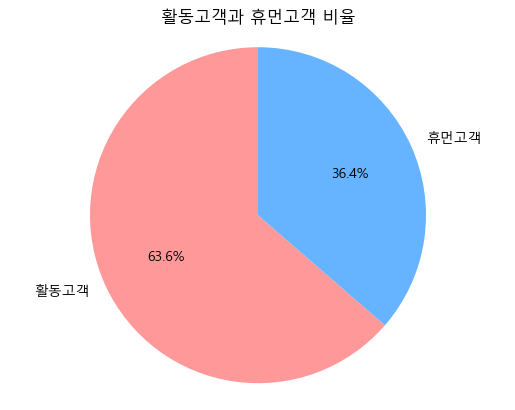

In [690]:
# 조건에 따른 고객 수 계산
count_less_than_72 = len(df[df['PurchaseInterval'] < 72])
count_greater_or_equal_72 = len(df[df['PurchaseInterval'] >= 72]) + len(df[df['PurchaseInterval'].isnull()])

# 원형 차트 데이터 준비
labels = ['활동고객', '휴먼고객']
sizes = [count_less_than_72, count_greater_or_equal_72]
colors = ['#ff9999','#66b3ff']

# 원형 차트 그리기
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('활동고객과 휴먼고객 비율')
plt.show()

In [669]:
# 활동고객의 describe
df[df['PurchaseInterval'] < 72].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,PrevInvoiceDate,PurchaseInterval
count,11733.000000,11733,11733.000000,11733.000000,11733,11733.000000
mean,32.685588,2011-07-14 02:03:29.092303616,7.922617,15250.461604,2011-06-22 17:53:48.647404800,20.899088
min,1.000000,2010-12-01 08:28:00,0.040000,12347.000000,2010-12-01 08:26:00,0.000000
25%,3.000000,2011-04-19 12:22:00,1.250000,13767.000000,2011-03-28 10:14:00,4.000000
50%,10.000000,2011-07-25 12:34:00,2.080000,15110.000000,2011-07-01 10:58:00,15.000000
75%,24.000000,2011-10-23 10:46:00,4.650000,16779.000000,2011-09-28 10:39:00,34.000000
max,3186.000000,2011-12-09 12:49:00,8142.750000,18287.000000,2011-12-09 12:23:00,71.000000
std,107.744854,NaN,115.214670,1741.484408,NaN,19.278771


In [671]:
# 휴먼고객의 describe
df.loc[df['PurchaseInterval'] >= 72 | df['PurchaseInterval'].isnull()].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,PrevInvoiceDate,PurchaseInterval
count,12241.000000,12241,12241.000000,12241.000000,12241,12241.000000
mean,35.556490,2011-07-22 22:06:10.160934400,6.702459,15266.762601,2011-06-06 14:14:16.415325440,45.825096
min,1.000000,2010-12-02 15:40:00,0.040000,12347.000000,2010-12-01 08:35:00,1.000000
25%,3.000000,2011-05-06 11:20:00,1.250000,13784.000000,2011-03-10 15:06:00,12.000000
50%,10.000000,2011-08-05 11:52:00,2.080000,15159.000000,2011-06-08 11:43:00,28.000000
75%,24.000000,2011-10-24 13:59:00,4.250000,16779.000000,2011-09-08 12:16:00,58.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,2011-12-07 13:46:00,365.000000
std,738.361327,NaN,102.627862,1732.837394,NaN,53.178358


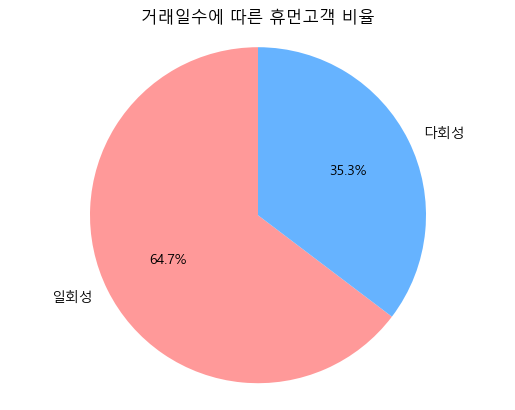

In [689]:
not_activate = df.loc[(df['PurchaseInterval'] >= 72) | (df['PurchaseInterval'].isnull())]

one_count = 4338
more_than_count = 2369

# 원형 차트 데이터 준비
labels = ['일회성', '다회성']
sizes = [one_count, more_than_count]
colors = ['#ff9999','#66b3ff']

# 원형 차트 그리기
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('거래일수에 따른 휴먼고객 비율')
plt.show()

In [683]:
not_activate['PurchaseInterval'].isnull().sum()

4338

In [684]:
len(not_activate['PurchaseInterval'])

6707

In [685]:
6707-4338

2369

- 평균 구매주기를 초과하는 고객들은 휴먼 고객으로 분류 하자


### RFM

In [711]:
active = df[df['PurchaseInterval'] < 72].copy()
active

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrevInvoiceDate,PurchaseInterval
72246,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2010-12-07 14:57:00,49.0
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,2011-01-26 14:30:00,70.0
220572,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347.0,Iceland,2011-04-07 10:43:00,63.0
286621,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,2011-06-09 13:01:00,53.0
535004,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347.0,Iceland,2011-10-31 12:25:00,37.0
...,...,...,...,...,...,...,...,...,...,...
456134,575675,23493,VINTAGE DOILY TRAVEL SEWING KIT,1,2011-11-10 15:07:00,1.95,18283.0,United Kingdom,2011-11-10 14:59:00,0.0
494085,578262,23349,ROLL WRAP VINTAGE CHRISTMAS,2,2011-11-23 13:27:00,1.25,18283.0,United Kingdom,2011-11-10 15:07:00,12.0
514067,579673,23294,SET OF 6 SNACK LOAF BAKING CASES,5,2011-11-30 12:59:00,0.83,18283.0,United Kingdom,2011-11-23 13:27:00,6.0
530454,580872,22587,FELTCRAFT HAIRBAND RED AND BLUE,1,2011-12-06 12:02:00,0.85,18283.0,United Kingdom,2011-11-30 12:59:00,5.0


In [719]:
active['TotalPrice'] = (active['Quantity']) * (active['UnitPrice'])

In [718]:
active['InvoiceYM'] = active['InvoiceDate'].dt.strftime('%Y-%m')

In [709]:
active['TotalPrice'].describe()

count    11733.000000
mean        66.064792
std        411.727386
min          0.100000
25%         10.200000
50%         17.850000
75%         45.000000
max      38970.000000
Name: TotalPrice, dtype: float64

In [720]:
active

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrevInvoiceDate,PurchaseInterval,InvoiceYM,TotalPrice
72246,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2010-12-07 14:57:00,49.0,2011-01,20.40
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,2011-01-26 14:30:00,70.0,2011-04,17.00
220572,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347.0,Iceland,2011-04-07 10:43:00,63.0,2011-06,24.96
286621,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,2011-06-09 13:01:00,53.0,2011-08,13.20
535004,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347.0,Iceland,2011-10-31 12:25:00,37.0,2011-12,17.40
...,...,...,...,...,...,...,...,...,...,...,...,...
456134,575675,23493,VINTAGE DOILY TRAVEL SEWING KIT,1,2011-11-10 15:07:00,1.95,18283.0,United Kingdom,2011-11-10 14:59:00,0.0,2011-11,1.95
494085,578262,23349,ROLL WRAP VINTAGE CHRISTMAS,2,2011-11-23 13:27:00,1.25,18283.0,United Kingdom,2011-11-10 15:07:00,12.0,2011-11,2.50
514067,579673,23294,SET OF 6 SNACK LOAF BAKING CASES,5,2011-11-30 12:59:00,0.83,18283.0,United Kingdom,2011-11-23 13:27:00,6.0,2011-11,4.15
530454,580872,22587,FELTCRAFT HAIRBAND RED AND BLUE,1,2011-12-06 12:02:00,0.85,18283.0,United Kingdom,2011-11-30 12:59:00,5.0,2011-12,0.85


In [726]:
last_timestamp = active['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = active.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (last_timestamp - x.max()).days,
                              'InvoiceNo' : 'count',
                              'TotalPrice' : 'sum',
                                 'PurchaseInterval' : 'mean'})

In [727]:
rfm.rename(columns={'InvoiceDate' : 'Recency',
                    'InvoiceNo' : 'Frequency',
                    'TotalPrice' : 'MonetaryValue',
                   'PurchaseInterval' : 'Length'}, inplace=True)
rfm

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12347.0,2,5,92.96,54.400000
12348.0,249,2,141.76,54.500000
12352.0,36,6,503.60,12.833333
12359.0,305,1,15.90,26.000000
12360.0,52,1,15.30,60.000000
...,...,...,...,...
18260.0,173,5,110.97,36.600000
18261.0,43,1,19.80,52.000000
18272.0,3,4,48.32,41.750000


In [728]:
rfm.describe()

,Recency,Frequency,MonetaryValue,Length
count,2255.000000,2255.000000,2255.000000,2255.000000
mean,78.807095,5.203104,343.741996,27.962588
std,92.489192,9.953195,1786.989027,16.886532
min,1.000000,1.000000,0.120000,0.000000
25%,10.500000,1.000000,19.800000,16.000000
50%,32.000000,2.000000,56.400000,26.250000
75%,128.000000,5.000000,166.870000,38.500000
max,373.000000,209.000000,39619.500000,71.000000


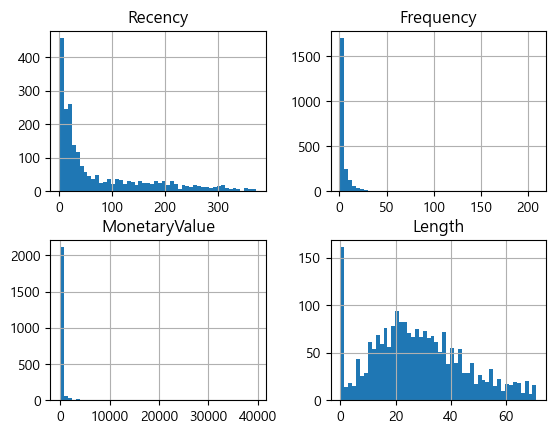

In [729]:
rfm.hist(bins=50);

<Axes: >

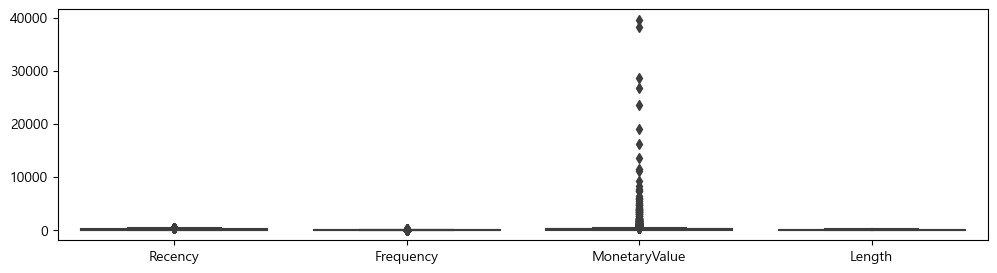

In [738]:
plt.figure(figsize=(12,3))
sns.boxplot(rfm)

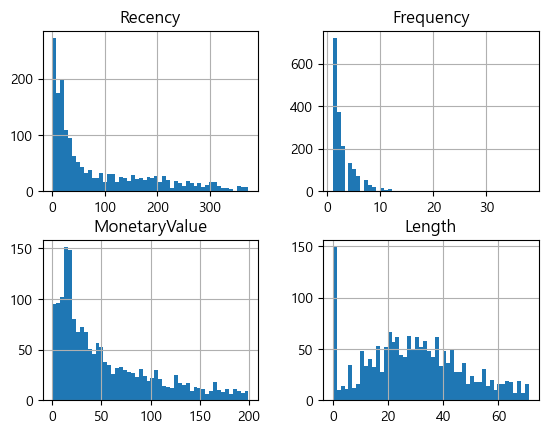

In [739]:
rfm[rfm['MonetaryValue'] < 200].hist(bins=50);

In [740]:
r_labels = list(range(5,0,-1))
f_labels = list(range(1,6,1))
m_labels = list(range(1,6,1))
l_labels = list(range(5,0,-1))
cut_size = 5

In [741]:
r_qcut = pd.qcut(x=rfm['Recency'], q=cut_size, labels=r_labels)
r_qcut

CustomerID
12347.0    5
12348.0    1
12352.0    3
12359.0    1
12360.0    3
          ..
18260.0    1
18261.0    3
18272.0    5
18283.0    5
18287.0    3
Name: Recency, Length: 2255, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [742]:
r_qcut.value_counts(1)

Recency
4    0.206652
5    0.202217
2    0.200443
1    0.198670
3    0.192018
Name: proportion, dtype: float64

In [747]:
f_qcut = pd.qcut(rfm['Frequency'], q=cut_size, labels=f_labels, duplicates='drop')
m_qcut = pd.qcut(rfm['MonetaryValue'], q=cut_size, labels=m_labels, duplicates='drop')
l_qcut = pd.qcut(rfm['Length'], q=cut_size, labels=l_labels, duplicates='drop')

ValueError: Bin labels must be one fewer than the number of bin edges

In [748]:
rfm

,Recency,Frequency,MonetaryValue,Length,R,F,M,L
CustomerID,,,,,,,,
12347.0,2,5,92.96,54.400000,5,5,5,1
12348.0,249,2,141.76,54.500000,1,3,4,2
12352.0,36,6,503.60,12.833333,3,4,5,2
12359.0,305,1,15.90,26.000000,1,5,5,2
12360.0,52,1,15.30,60.000000,3,5,5,4
...,...,...,...,...,...,...,...,...
18260.0,173,5,110.97,36.600000,1,5,5,3
18261.0,43,1,19.80,52.000000,3,2,2,5
18272.0,3,4,48.32,41.750000,5,5,5,2


In [744]:
# 만든 rfm 점수를 컬럼에 추가하자 
rfm = rfm.assign(R=r_qcut, F = f_qcut, M = m_qcut, L = l_qcut)
rfm.head()

,Recency,Frequency,MonetaryValue,Length,R,F,M,L
CustomerID,,,,,,,,
12347.0,2,5,92.96,54.400000,5,5,5,1
12348.0,249,2,141.76,54.500000,1,3,4,2
12352.0,36,6,503.60,12.833333,3,4,5,2
12359.0,305,1,15.90,26.000000,1,5,5,2
12360.0,52,1,15.30,60.000000,3,5,5,4


In [750]:
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str) + rfm['L'].astype(str)

In [751]:
rfm['RFM_score'] = rfm[['R','F','M','L']].astype(int).sum(axis=1)
rfm

,Recency,Frequency,MonetaryValue,Length,R,F,M,L,RFM_segment,RFM_score
CustomerID,,,,,,,,,,
12347.0,2,5,92.96,54.400000,5,5,5,1,5551,16
12348.0,249,2,141.76,54.500000,1,3,4,2,1342,10
12352.0,36,6,503.60,12.833333,3,4,5,2,3452,14
12359.0,305,1,15.90,26.000000,1,5,5,2,1552,13
12360.0,52,1,15.30,60.000000,3,5,5,4,3554,17
...,...,...,...,...,...,...,...,...,...,...
18260.0,173,5,110.97,36.600000,1,5,5,3,1553,14
18261.0,43,1,19.80,52.000000,3,2,2,5,3225,12
18272.0,3,4,48.32,41.750000,5,5,5,2,5552,17


<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

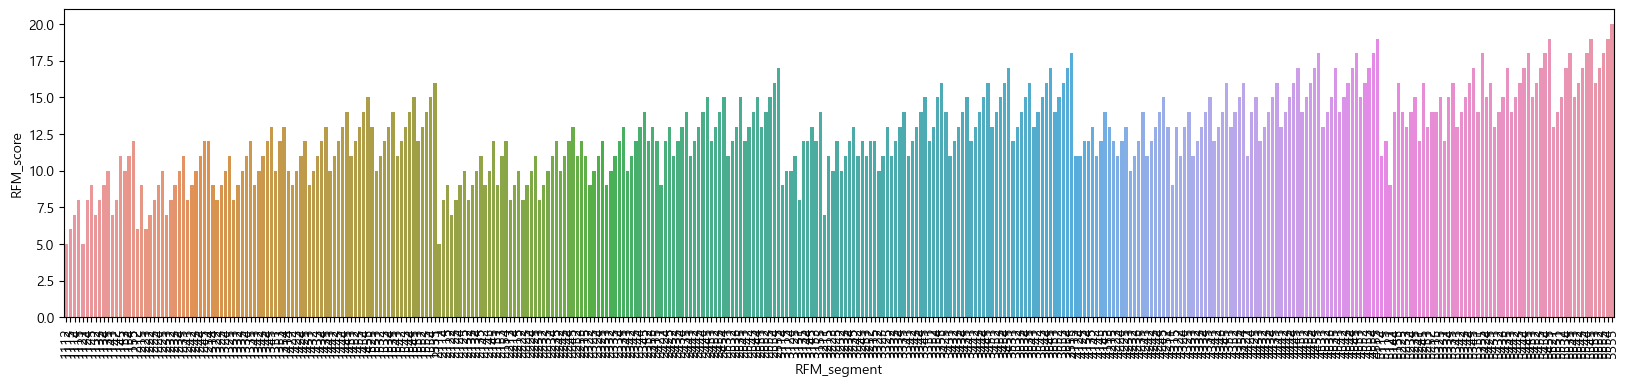

In [752]:
# RFM_segment 값에 따라 정렬 
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segment'), x='RFM_segment', y='RFM_score')

In [753]:
rfm.to_csv('active_rfm.csv')

In [762]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=3, labels=['silver','gold','platinum'])
rfm.head()

,Recency,Frequency,MonetaryValue,Length,R,F,M,L,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,,,
12347.0,2,5,92.96,54.400000,5,5,5,1,5551,16,platinum
12348.0,249,2,141.76,54.500000,1,3,4,2,1342,10,silver
12352.0,36,6,503.60,12.833333,3,4,5,2,3452,14,gold
12359.0,305,1,15.90,26.000000,1,5,5,2,1552,13,silver
12360.0,52,1,15.30,60.000000,3,5,5,4,3554,17,platinum


In [763]:
rfm.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1041.0,11.339097,1.572999,5.0,10.0,12.0,13.0,13.0
gold,705.0,14.482270,0.500040,14.0,14.0,14.0,15.0,15.0
platinum,509.0,16.640472,0.965147,16.0,16.0,16.0,17.0,20.0


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

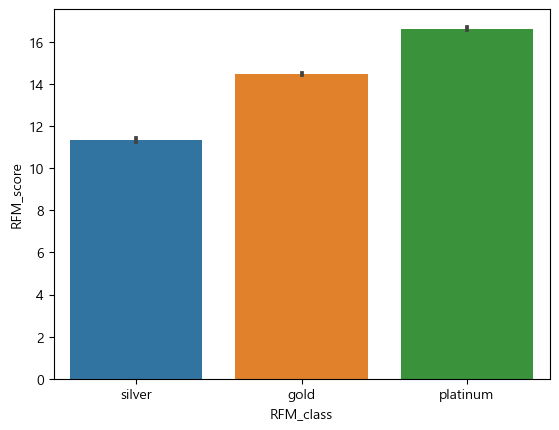

In [764]:
sns.barplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

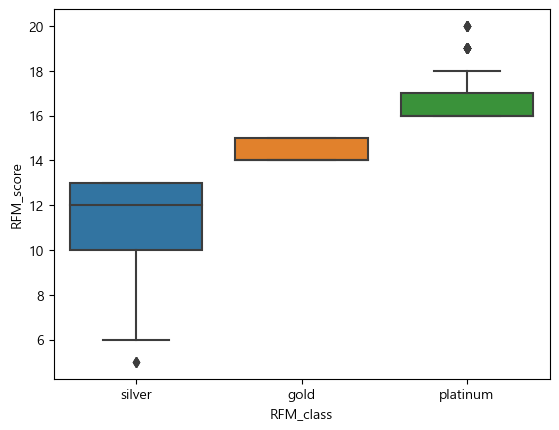

In [765]:
sns.boxplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='R', ylabel='RFM_score'>

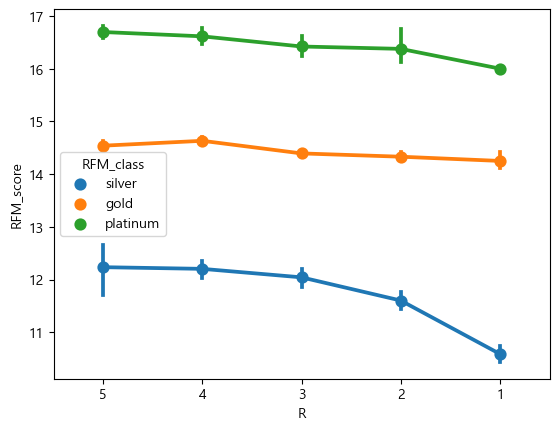

In [766]:
sns.pointplot(data=rfm, x='R', y='RFM_score', hue='RFM_class')

In [767]:
rfm_cluster = rfm.iloc[:,:4]
rfm_cluster

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12347.0,2,5,92.96,54.400000
12348.0,249,2,141.76,54.500000
12352.0,36,6,503.60,12.833333
12359.0,305,1,15.90,26.000000
12360.0,52,1,15.30,60.000000
...,...,...,...,...
18260.0,173,5,110.97,36.600000
18261.0,43,1,19.80,52.000000
18272.0,3,4,48.32,41.750000


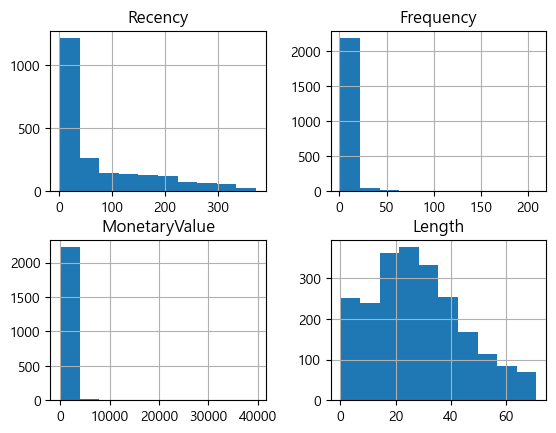

In [768]:
rfm_cluster.hist();

In [769]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log.head()

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12347.0,1.098612,1.791759,4.542869,4.014580
12348.0,5.521461,1.098612,4.961165,4.016383
12352.0,3.610918,1.945910,6.223766,2.627081
12359.0,5.723585,0.693147,2.827314,3.295837
12360.0,3.970292,0.693147,2.791165,4.110874


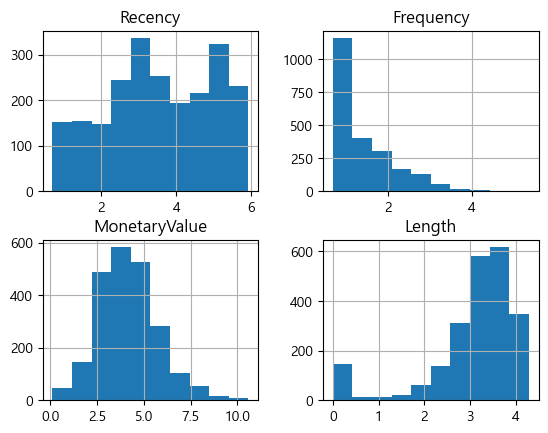

In [770]:
rfm_cluster_log.hist();

In [771]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)
X = pd.DataFrame(X, columns = rfm_cluster_log.columns)
X

,Recency,Frequency,MonetaryValue,Length
0,-1.697705,0.475525,0.236039,0.949614
1,1.374692,-0.428925,0.500235,0.951408
2,0.047505,0.676668,1.297693,-0.430484
3,1.515100,-0.957995,-0.847504,0.234705
4,0.297149,-0.957995,-0.870336,1.045395
...,...,...,...,...
2250,1.122941,0.475525,0.346798,0.564106
2251,0.167871,-0.957995,-0.716359,0.905563
2252,-1.497863,0.237624,-0.171051,0.691786
2253,-1.342853,1.755357,0.021504,0.066531


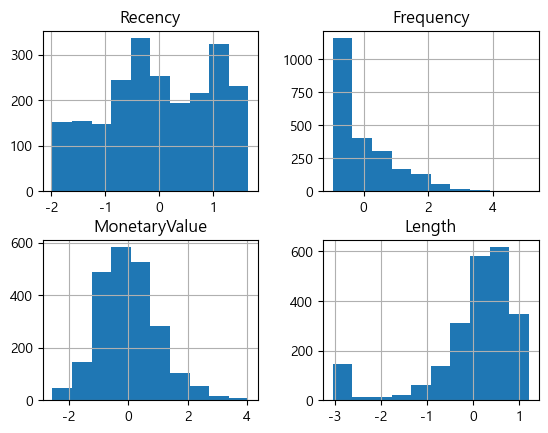

In [772]:
X.hist();

In [773]:
from sklearn.cluster import KMeans

kmean = KMeans(n_init='auto',random_state=42)
kmean.fit(X)
kmean.cluster_centers_, kmean.inertia_
# inertia_ 는 군집간 거리 (성능지표)

C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


(array([[-1.02097273,  0.11134766,  0.05087809,  0.18856291],
        [ 0.6795522 ,  0.0123436 ,  0.38624188,  0.31025601],
        [-1.34672083,  2.50074965,  2.05031013, -0.53640671],
        [ 1.18022675, -0.89759562, -0.78139509, -2.84899005],
        [-0.66364122,  1.16601086,  0.9607619 ,  0.1118482 ],
        [-0.38477732, -0.75967143, -0.87289967,  0.39333463],
        [ 1.08475084, -0.78554384, -0.77312571,  0.47053436],
        [-0.30848638, -0.70654248, -0.5978577 , -2.63083177]]),
 2242.6868622695674)

In [774]:
kmean.cluster_centers_.shape

(8, 4)

C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


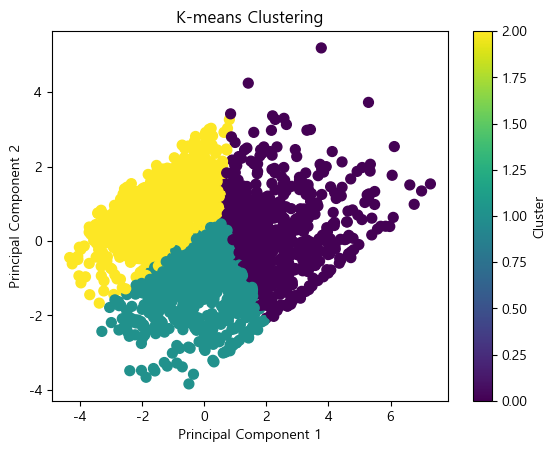

In [775]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(rfm_cluster_log)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_features)

rfm_cluster['Cluster'] = clusters

# 클러스터 시각화 (PCA 축소된 2차원 데이터 기준)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [776]:
# 각 클러스터의 평균 특성
cluster_summary = rfm_cluster.groupby('Cluster').mean()
print(cluster_summary)

# 각 클러스터의 고객 수
cluster_counts = rfm_cluster['Cluster'].value_counts()
print(cluster_counts)

            Recency  Frequency  MonetaryValue     Length
Cluster                                                 
0         20.285476  13.171953    1141.870050  22.356072
1         18.334672   2.694779      44.070602  29.978870
2        167.066007   2.013201      64.067437  30.000147
Cluster
2    909
1    747
0    599
Name: count, dtype: int64


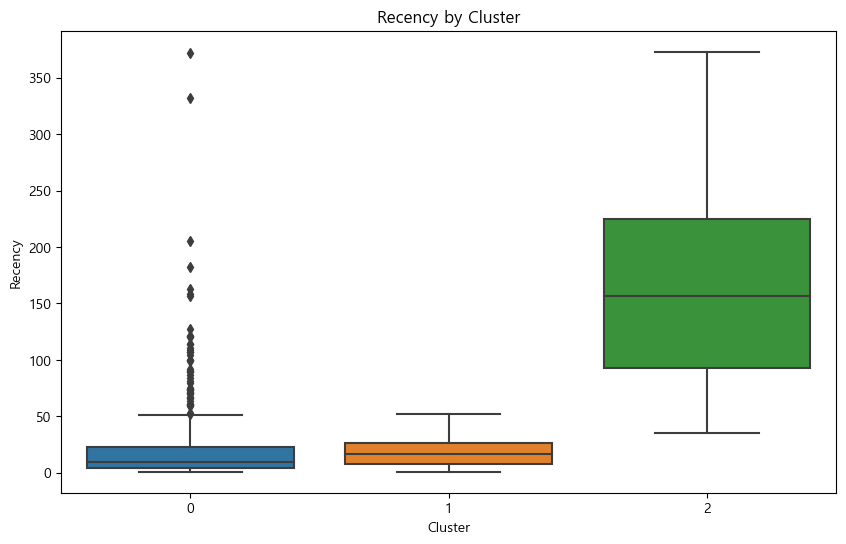

In [777]:
import seaborn as sns

# 클러스터별 분포 시각화 (예: Recency)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm_cluster)
plt.title('Recency by Cluster')
plt.show()

In [778]:
# 클러스터별 평균 특성
cluster_summary = rfm_cluster.groupby('Cluster').mean()

# 클러스터별 중앙값 특성
cluster_median = rfm_cluster.groupby('Cluster').median()

print("클러스터별 평균:")
print(cluster_summary)

print("\n클러스터별 중앙값:")
print(cluster_median)

클러스터별 평균:
            Recency  Frequency  MonetaryValue     Length
Cluster                                                 
0         20.285476  13.171953    1141.870050  22.356072
1         18.334672   2.694779      44.070602  29.978870
2        167.066007   2.013201      64.067437  30.000147

클러스터별 중앙값:
         Recency  Frequency  MonetaryValue     Length
Cluster                                              
0           10.0        9.0         317.58  21.384615
1           17.0        2.0          35.40  29.000000
2          157.0        1.0          30.75  30.000000


In [779]:
# 각 클러스터의 고객 수
cluster_counts = rfm_cluster['Cluster'].value_counts()
print("클러스터별 고객 수:")
print(cluster_counts)

클러스터별 고객 수:
Cluster
2    909
1    747
0    599
Name: count, dtype: int64


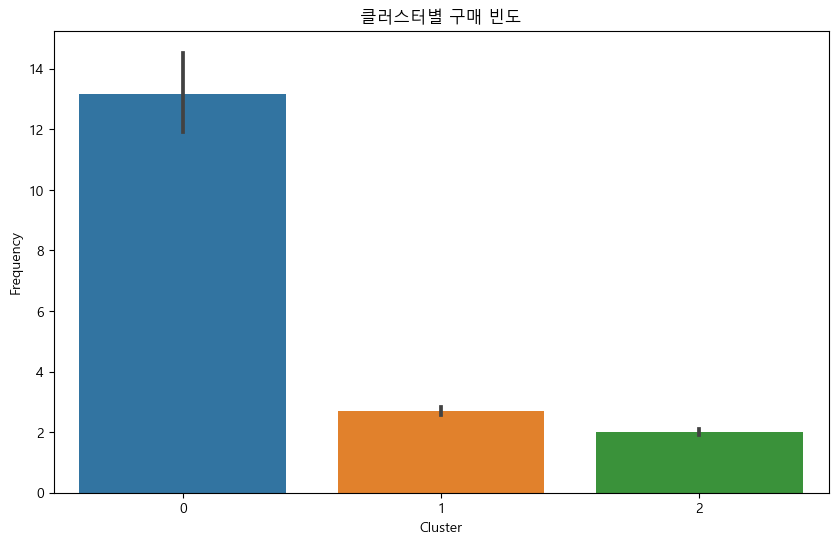

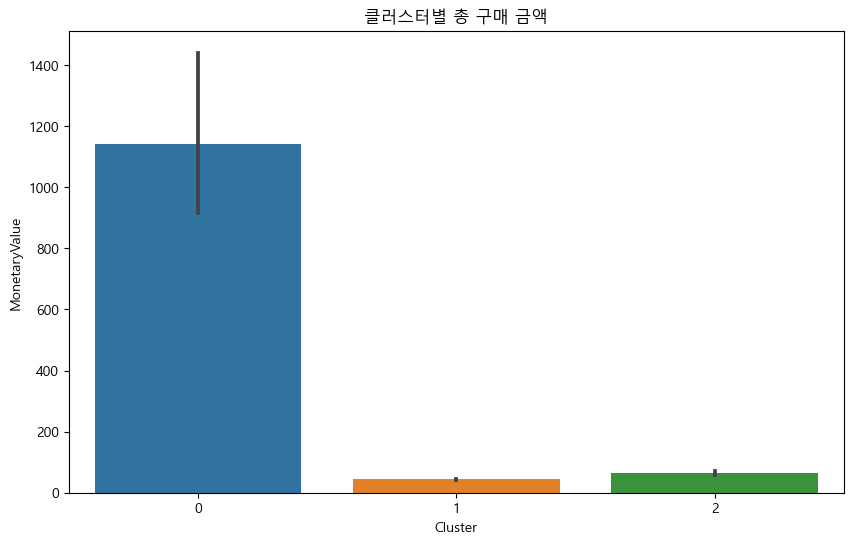

In [780]:
# 클러스터별 구매 빈도
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Frequency', data=rfm_cluster)
plt.title('클러스터별 구매 빈도')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

# 클러스터별 총 구매 금액
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='MonetaryValue', data=rfm_cluster)
plt.title('클러스터별 총 구매 금액')
plt.xlabel('Cluster')
plt.ylabel('MonetaryValue')
plt.show()

## 평균 구매주기 예측

In [785]:
active.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrevInvoiceDate,PurchaseInterval,InvoiceYM,TotalPrice
72246,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2010-12-07 14:57:00,49.0,2011-01,20.40
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,2011-01-26 14:30:00,70.0,2011-04,17.00
220572,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347.0,Iceland,2011-04-07 10:43:00,63.0,2011-06,24.96
286621,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,2011-06-09 13:01:00,53.0,2011-08,13.20
535004,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347.0,Iceland,2011-10-31 12:25:00,37.0,2011-12,17.40


In [787]:
active.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
PrevInvoiceDate     0
PurchaseInterval    0
InvoiceYM           0
TotalPrice          0
dtype: int64

In [789]:
# 날짜 형식 변환
active['InvoiceDate'] = pd.to_datetime(active['InvoiceDate'])
active['PrevInvoiceDate'] = pd.to_datetime(active['PrevInvoiceDate'])

# 특성 생성: 구매 주기 예측을 위한 입력 변수 생성
active['DaysSinceLastPurchase'] = (active['InvoiceDate'] - active['PrevInvoiceDate']).dt.days
active['Month'] = active['InvoiceDate'].dt.month
active['Year'] = active['InvoiceDate'].dt.year

active

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrevInvoiceDate,PurchaseInterval,InvoiceYM,TotalPrice,DaysSinceLastPurchase,Month,Year
72246,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2010-12-07 14:57:00,49.0,2011-01,20.40,49,1,2011
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,2011-01-26 14:30:00,70.0,2011-04,17.00,70,4,2011
220572,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347.0,Iceland,2011-04-07 10:43:00,63.0,2011-06,24.96,63,6,2011
286621,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,2011-06-09 13:01:00,53.0,2011-08,13.20,53,8,2011
535004,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347.0,Iceland,2011-10-31 12:25:00,37.0,2011-12,17.40,37,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456134,575675,23493,VINTAGE DOILY TRAVEL SEWING KIT,1,2011-11-10 15:07:00,1.95,18283.0,United Kingdom,2011-11-10 14:59:00,0.0,2011-11,1.95,0,11,2011
494085,578262,23349,ROLL WRAP VINTAGE CHRISTMAS,2,2011-11-23 13:27:00,1.25,18283.0,United Kingdom,2011-11-10 15:07:00,12.0,2011-11,2.50,12,11,2011
514067,579673,23294,SET OF 6 SNACK LOAF BAKING CASES,5,2011-11-30 12:59:00,0.83,18283.0,United Kingdom,2011-11-23 13:27:00,6.0,2011-11,4.15,6,11,2011
530454,580872,22587,FELTCRAFT HAIRBAND RED AND BLUE,1,2011-12-06 12:02:00,0.85,18283.0,United Kingdom,2011-11-30 12:59:00,5.0,2011-12,0.85,5,12,2011


In [796]:
active = active.merge(rfm, on='CustomerID', how='left')

In [797]:
numerical_data = active.select_dtypes(include=[int, float])

# 상관계수 계산
correlation_matrix = numerical_data.corr()

# PurchaseInterval과 다른 변수들 간의 상관관계
purchase_interval_correlation = correlation_matrix['PurchaseInterval']
print(purchase_interval_correlation)

Quantity                -0.049197
UnitPrice               -0.028076
CustomerID               0.013375
PurchaseInterval         1.000000
TotalPrice              -0.048272
DaysSinceLastPurchase    1.000000
Month                   -0.098879
Year                     0.187350
Recency                  0.149588
Frequency               -0.363329
MonetaryValue           -0.245810
Length                   0.698082
RFM_score               -0.256815
Name: PurchaseInterval, dtype: float64


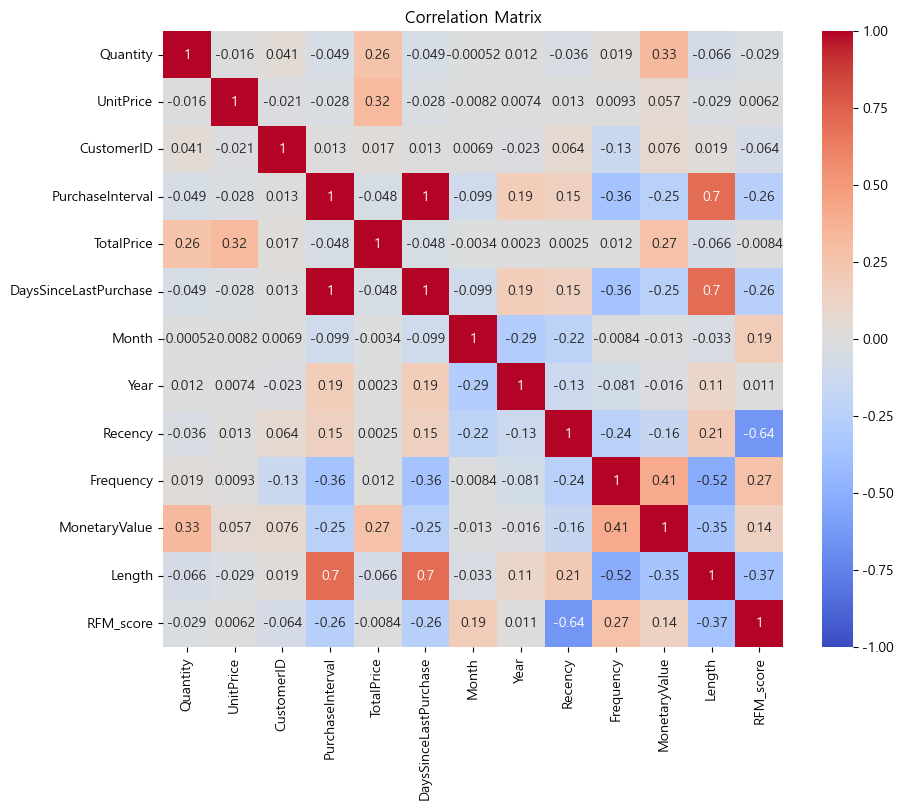

In [799]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [802]:
# 예측할 변수와 사용할 특성 선택
features = active[['RFM_score', 'Recency', 'Frequency', 'MonetaryValue', 'Length']]
target = active['PurchaseInterval']

In [803]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [804]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [805]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [806]:
y_pred = model.predict(X_test)

In [807]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 275.28962139745636
R^2 Score: 0.24889659317849488


In [808]:
# 새로운 데이터 예시 (예: 이전 구매 이력 기반)
new_data = pd.DataFrame({
    'RFM_score': [15],
    'Recency': [20],
    'Frequency': [10],
    'MonetaryValue': [500],
    'Length': [10]
})

# 데이터 스케일링
new_data_scaled = scaler.transform(new_data)

# 예측 수행
future_purchase_interval = model.predict(new_data_scaled)
print(f'Predicted Purchase Interval: {future_purchase_interval[0]}')

Predicted Purchase Interval: 11.43115230105249


In [809]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [810]:
# 모델 초기화
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor()
}

In [811]:
# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'R2 Score': r2
    }


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 9386, number of used features: 5
[LightGBM] [Info] Start training from score 20.944918


In [812]:
# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)

                          MSE  R2 Score
Linear Regression  185.256624  0.494544
Ridge              185.257417  0.494542
Lasso              186.616813  0.490833
Random Forest      275.667564  0.247865
Gradient Boosting  195.049856  0.467824
XGBoost            270.595552  0.261704
LightGBM           221.097710  0.396754


In [813]:
from sklearn.model_selection import GridSearchCV

# 예를 들어, RandomForest의 하이퍼파라미터 튜닝
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 227.71224156329217


In [815]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 195.92732337371845


## active 하지 않은 고객들의 빈도 구매 주기 예측 

In [820]:
idx = active['CustomerID'].unique()

In [822]:
target_df = df[~df['CustomerID'].isin(idx)]
target_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrevInvoiceDate,PurchaseInterval
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,NaT,NaN
485502,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,12349.0,Italy,NaT,NaN
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,12350.0,Norway,NaT,NaN
197371,553900,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2011-05-19 17:47:00,9.95,12353.0,Bahrain,NaT,NaN
166267,550911,23201,JUMBO BAG ALPHABET,10,2011-04-21 13:11:00,2.08,12354.0,Spain,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
362490,568492,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2011-09-27 11:58:00,4.25,18278.0,United Kingdom,NaT,NaN
111045,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,18280.0,United Kingdom,NaT,NaN
222954,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,18281.0,United Kingdom,NaT,NaN
291854,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,18282.0,United Kingdom,NaT,NaN
